In [1]:
!pip install opencv-python-headless

import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

img_dir = 'C:/Users/Cy/OneDrive/Pictures/'

orange = cv2.imread(img_dir + 'orange.jpeg')
jabe = cv2.imread(img_dir + 'jabe.jpeg')
girl = cv2.imread(img_dir + 'girl.jpeg')
tree = cv2.imread(img_dir + 'tree.jpeg')
moon = cv2.imread(img_dir + 'moon.png')

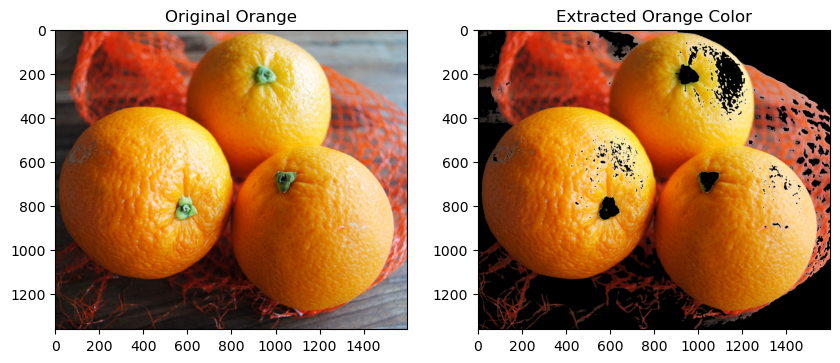

In [2]:
# 1. Get the color orange  of the given image
# Convert the image to the HSV color space
hsv = cv2.cvtColor(orange, cv2.COLOR_BGR2HSV)

# Define the range of orange color in HSV
lower_orange = np.array([0, 50, 50])
upper_orange = np.array([30, 255, 255])

# Threshold the image to get only orange color
mask = cv2.inRange(hsv, lower_orange, upper_orange)

# Get the color orange from the original image
color_orange = cv2.bitwise_and(orange, orange, mask=mask)

# Convert the image to RGB
orange_rgb = cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)
color_orange_rgb = cv2.cvtColor(color_orange, cv2.COLOR_BGR2RGB)

# Create a figure to display both images
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axs[0].imshow(orange_rgb)
axs[0].set_title('Original Orange')

# Display the extracted orange color
axs[1].imshow(color_orange_rgb)
axs[1].set_title('Extracted Orange Color')

# Show the plot
plt.show()

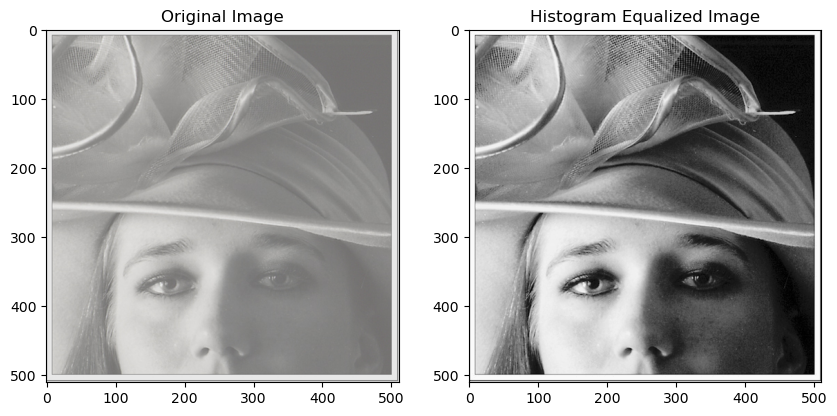

In [3]:
# 2. Apply histogram equalization to the given image
# Convert the image to grayscale
girl_gray = cv2.cvtColor(girl, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
girl_equalized = cv2.equalizeHist(girl_gray)

# Display the original and equalized images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show the original image
axs[0].imshow(cv2.cvtColor(girl, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')

# Show the equalized image
axs[1].imshow(girl_equalized, cmap='gray')
axs[1].set_title('Histogram Equalized Image')

# Display the plot
plt.show()

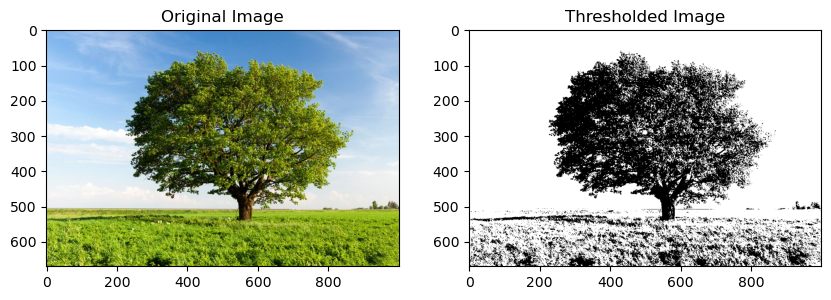

In [4]:
# 3. Appy thresholding method to exclude the sky from the image
# Convert the image to grayscale
tree_gray = cv2.cvtColor(tree, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(tree_gray, 110, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show the original image
axs[0].imshow(cv2.cvtColor(tree, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')

# Show the thresholded image
axs[1].imshow(thresh, cmap='gray')
axs[1].set_title('Thresholded Image')

# Display the plot
plt.show()

In [5]:
!pip install pytesseract
import pytesseract

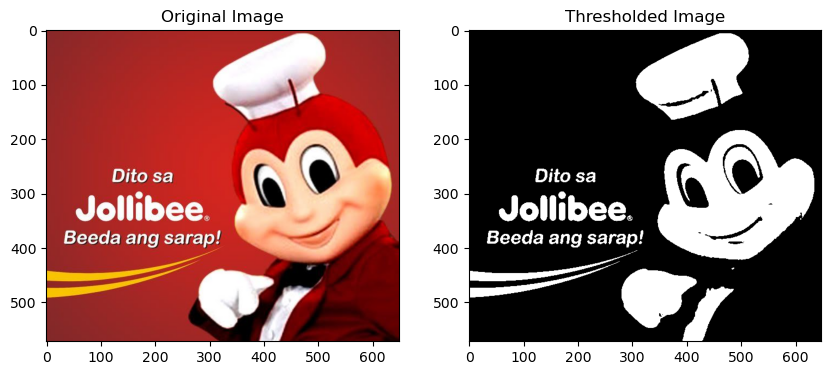

Extracted Text:
Dito sa
Jollibee.
Beeda ang sarap!

TL




In [6]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# Load the image
img_path = r"C:\Users\Cy\OneDrive\Pictures\jabe.jpeg"
img = cv2.imread(img_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to preprocess the image
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# Perform OCR using Tesseract
text = pytesseract.image_to_string(Image.fromarray(gray))

# Display the original and thresholded image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(gray, cmap="gray")
ax[1].set_title("Thresholded Image")
plt.show()

# Print the extracted text
print("Extracted Text:")
print(text)


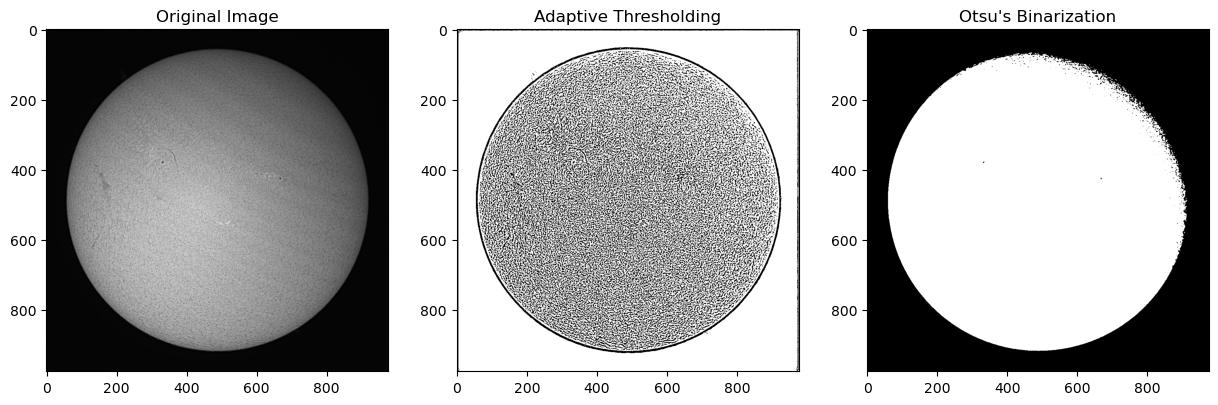

In [7]:
# Load the image
img_dir = 'C:/Users/Cy/OneDrive/Pictures/'
moon = cv2.imread(img_dir + 'moon.png')

# Convert the image to grayscale
gray = cv2.cvtColor(moon, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
thresh_adapt = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Otsu's binarization
ret, thresh_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original, adaptive thresholded, and Otsu thresholded images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cv2.cvtColor(moon, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(thresh_adapt, cmap="gray")
ax[1].set_title("Adaptive Thresholding")
ax[2].imshow(thresh_otsu, cmap="gray")
ax[2].set_title("Otsu's Binarization")
plt.show()